In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sys
sys.path.insert(0, '../')

from utils import *

%matplotlib inline

In [2]:
# def read_list(filename: str) -> list:
#     """ Extract the diversity or novelty list from txt file
    
#         Example usage:
#         >>> read_list('jaccard_diversities_real.txt')
#     """
#     import re
#     with open(file=filename, mode='r', encoding="ISO-8859-1") as f:
#         result_list = list()
#         data = f.read().split(',\n')
#         for line in data:
#             result_list.append(float(re.findall("\d+\.\d+", line)[0]))
            
#     return result_list

In [3]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_x, data_y, color='blue', label='Fake text', alpha=0.3)
    plt.scatter(data_x1, data_y1, color='red', label='Real text', alpha=0.3)

    plt.title('{} vs {} of sentences for generated text set'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
#     plt.xlim(0, 1)
#     plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()

In [4]:
def scale_back(distance, real_sentence, fake_sentence):
    """
    Want to scale back levenshtein distance
    """
    return distance * max(len(real_sentence), len(fake_sentence))

In [5]:
def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(val - min_val) / (max_val - min_val) for val in values]

## Retrieve the list of diversity and novelty from the text files


In [13]:
lev_normed_real_diversities = read_list('levenshtein_diversities_real.txt')
# lev_normed_real_diversities = normalize(real_diversities)

lev_normed_real_novelties = read_list('levenshtein_novelties_real.txt')
# lev_normed_real_novelties = normalize(real_novelties)

def _norm(dists):
    return [1 - dist for dist in dists]


# def _norm(dists):
#     return dists

lev_normed_fake_diversities = _norm(read_list('levenshtein_diversities_fake2.txt'))
# lev_normed_fake_diversities = normalize(fake_diversities)

lev_normed_fake_novelties = _norm(read_list('levenshtein_novelties_fake2.txt'))
# lev_normed_fake_novelties = normalize(fake_novelties)

# assert(len(lev_normed_real_diversities) == len(lev_normed_real_novelties))
# assert(len(lev_normed_fake_diversities) == len(lev_normed_fake_novelties))

### Scatter plot of normalised novelties vs diversities

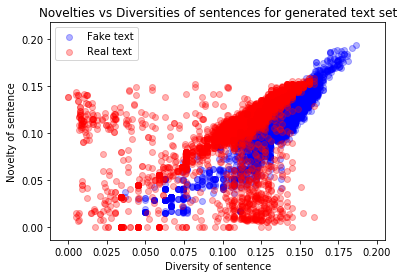

In [12]:
get_scatter_plot(lev_normed_fake_diversities, lev_normed_fake_novelties, \
                 lev_normed_real_diversities, lev_normed_real_novelties)

In [8]:
# get_scatter_plot(lev_normed_fake_diversities, lev_normed_fake_novelties, \
#                  lev_normed_real_diversities, lev_normed_real_novelties)

## Real text: Distribution of novelties and diversities

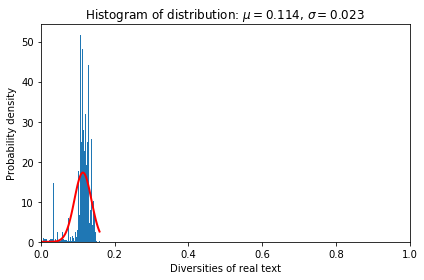

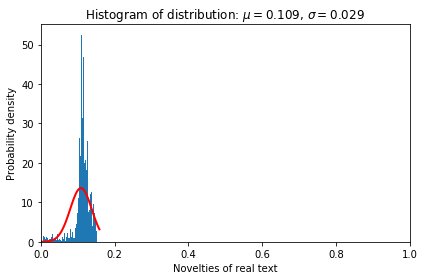

In [9]:
normal_distribution(lev_normed_real_diversities, 'Diversities of real text')
normal_distribution(lev_normed_real_novelties, 'Novelties of real text')

## Fake text: Distribution of novelties and diversities


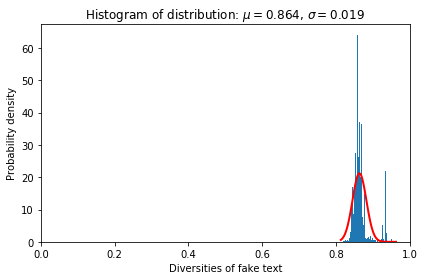

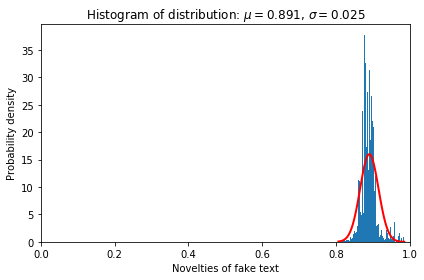

In [10]:
normal_distribution(lev_normed_fake_diversities, 'Diversities of fake text')
normal_distribution(lev_normed_fake_novelties, 'Novelties of fake text')